# Wednesday, October 29th, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

So far, we've discussed how to add salt and pepper noise to a grayscale image and how to apply the mean or median filters to clean up a noisy grayscale image.

Let's think about some other considerations for filtering images (note: these considerations are not necessary for [Project 4 - Image denoising](https://jllottes.github.io/Projects/image_denoising/image_denoising.html)).

## "Salt and pepper" noise on color images

When dealing with grayscale images, each pixel has a single float associated to it which represents the grayscale value of that pixel. For example, a grayscale value of `0` gives a black pixel while a grayscale value of `1` gives a white pixel. Salt and pepper noise can then be considered the result of one of these grayscale values being accidentally set to the maximum or minimum value.

What might salt and pepper noise look like for color images?


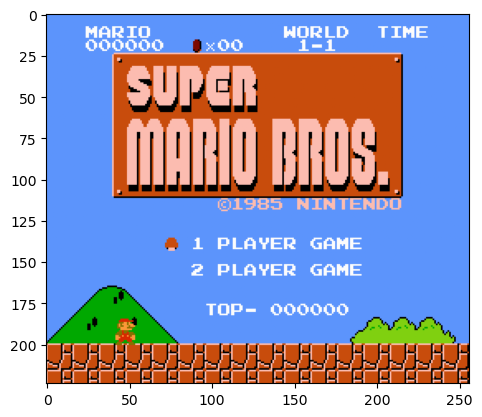

In [2]:
color_img = plt.imread('mario.png')[:,:,:3] # Drop the transparency channel to get RGB triples only

plt.imshow(color_img)

Let's try to add some salt and pepper noise in the form of pure white or pure black pixels.

In [3]:
noisy_color_img = color_img.copy()
nrows, ncols = color_img.shape[:2]

random_array = np.random.random((nrows, ncols))

for i in range(nrows):
    for j in range(ncols):
        if random_array[i,j] < .1:
            noisy_color_img[i,j] = 1
        if random_array[i,j] > .9:
            noisy_color_img[i,j] = 0

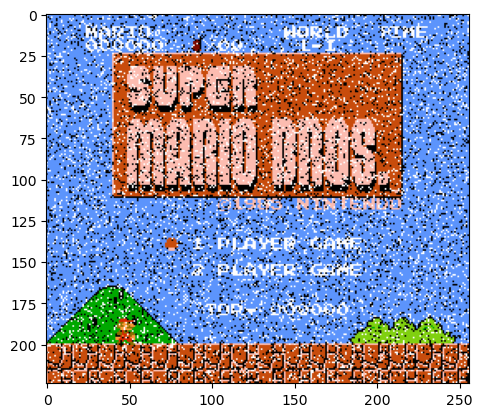

In [4]:
plt.imshow(noisy_color_img)

We say how to apply the median filter to grayscale images using `3` by `3` grids (and ignoring edge pixels). The code for this is included below. Does this work as-is without any changes?

In [6]:
num_rows, num_cols = noisy_color_img.shape[:2]
median_filtered_img = noisy_color_img.copy()

for i in range(1, num_rows-1):            # For now, let's skip the first and last rows
    for j in range(1, num_cols-1):        # and skip the first and last columns
        grid = noisy_color_img[i-1:i+2, j-1:j+2]
        median = np.median(grid)
        median_filtered_img[i,j] = median

In [8]:
grid.shape

(3, 3, 3)

In [9]:
median_filtered_img[i,j].shape

(3,)

(np.float64(-0.5), np.float64(255.5), np.float64(223.5), np.float64(-0.5))

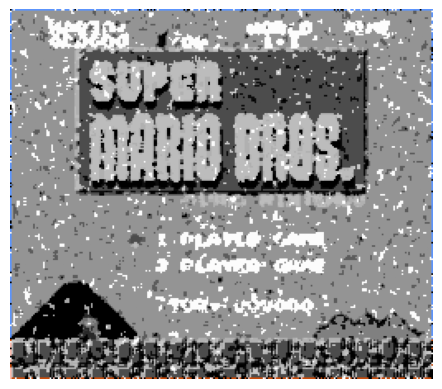

In [10]:
plt.imshow(median_filtered_img)
plt.axis('off')

What do we need to modify in order to deal with a color image?

With our old code: for each pixel to be filtered, we've constructed a `grid` consisting of `3` rows, `3` columns, and `3` color channels (RGB). We then take the `np.median` of this `3` by `3` by `3` slice, and set the RGB value for the filtered pixel to this median. In particular, we are forcing the red, green, and blue values to match (to the median) at each pixel, so we end up with a grayscale image. It might be better to separately compute the median red value, median green value, and median blue value.

We can use the keyword argument `axis=[0,1]` inside `np.median` to only compute medians through the rows and columns, but not the colors.

In [12]:
num_rows, num_cols = noisy_color_img.shape[:2]
median_filtered_img = noisy_color_img.copy()

for i in range(1, num_rows-1):            # For now, let's skip the first and last rows
    for j in range(1, num_cols-1):        # and skip the first and last columns
        for k in range(3):
            grid = noisy_color_img[i-1:i+2, j-1:j+2, k]
            median = np.median(grid)
            median_filtered_img[i,j,k] = median

In [14]:
num_rows, num_cols = noisy_color_img.shape[:2]
median_filtered_img = noisy_color_img.copy()

for i in range(1, num_rows-1):            # For now, let's skip the first and last rows
    for j in range(1, num_cols-1):        # and skip the first and last columns
        grid = noisy_color_img[i-1:i+2, j-1:j+2]
        median = np.median(grid, axis=[0,1])
        median_filtered_img[i,j] = median

(np.float64(-0.5), np.float64(255.5), np.float64(223.5), np.float64(-0.5))

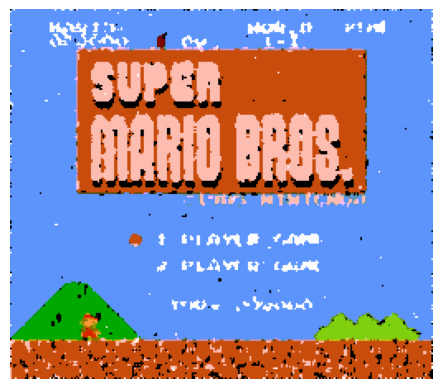

In [15]:
plt.imshow(median_filtered_img)
plt.axis('off')

In the discussion above above, the salt and pepper noise took the form of white and black pixels within the image. That is, for a given pixel we've hit all color channels together with salt/pepper noise (if they get hit at all). It could also be the case that the color channels are independently affected by "salt"/"pepper" noise. That is, it might be that the red channel of the `[i,j]`th pixel is hit by salt noise (i.e. set to `1`) while the blue channel of the `[i,j]`th pixel is hit by pepper noise (i.e. set to `0`). Let's modify our code for adding salt/pepper noise so that the noise is added on a per-color channel basis.

In [16]:
noisy_color_img = color_img.copy()
nrows, ncols = color_img.shape[:2]

random_array = np.random.random((nrows, ncols, 3))

for i in range(nrows):
    for j in range(ncols):
        for k in range(3):
            if random_array[i,j,k] < .1:
                noisy_color_img[i,j,k] = 1
            if random_array[i,j,k] > .9:
                noisy_color_img[i,j,k] = 0

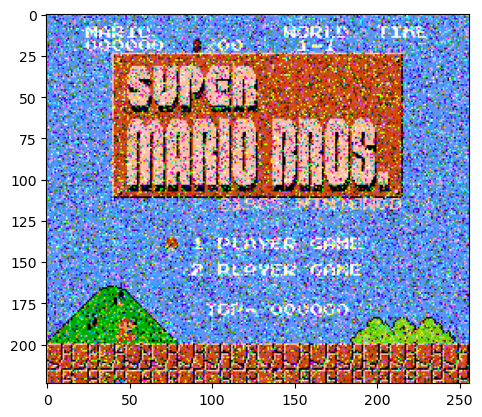

In [17]:
plt.imshow(noisy_color_img)

In [18]:
num_rows, num_cols = noisy_color_img.shape[:2]
median_filtered_img = noisy_color_img.copy()

for i in range(1, num_rows-1):            # For now, let's skip the first and last rows
    for j in range(1, num_cols-1):        # and skip the first and last columns
        grid = noisy_color_img[i-1:i+2, j-1:j+2]
        median = np.median(grid, axis=[0,1])
        median_filtered_img[i,j] = median

(np.float64(-0.5), np.float64(255.5), np.float64(223.5), np.float64(-0.5))

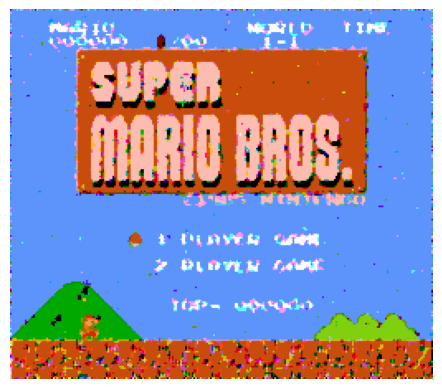

In [19]:
plt.imshow(median_filtered_img)
plt.axis('off')

## Speed

For large images, the median filter code above is somewhat slow. It would be nice if we could use NumPy to avoid the nested `for` loop iteration through every row and column.

For simplicity, let's return to working with grayscale images. I will again use the `face.png` image from the project page, along with the pre-noised version (saved as `noisy_img.png`).

In [20]:
img = np.mean(plt.imread('face.png')[:,:,:3], axis=2)
noisy_img = np.mean(plt.imread('noisy_img.png')[:,:,:3], axis=2)

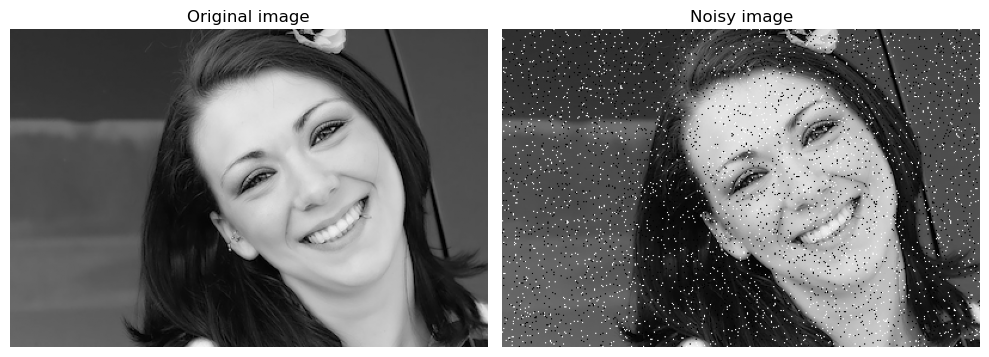

In [21]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=1)
plt.title('Noisy image')
plt.axis('off')

plt.tight_layout()

Let's time how long it takes our version of the `3` by `3` median filter that accounts for edge pixels.

In [22]:
from time import time

In [23]:
t0 = time()

num_rows, num_cols = noisy_img.shape
padded_img = np.ones((num_rows + 2, num_cols + 2))/2  # Create an array of 0.5 that will store our padded image
padded_img[1:-1, 1:-1] = noisy_img

median_filtered_img = noisy_img.copy()
for i in range(num_rows):
    for j in range(num_cols):
        grid = padded_img[i:i+3, j:j+3]    # Generate `grid` from `padded_img` so that we 
                                           # can always look left/right/up/down
        median = np.median(grid)
        median_filtered_img[i,j] = median

        
t1 = time()

print('Execution time:', t1-t0)

Execution time: 4.690693616867065


**Idea**: Let's construct nine versions of our array. In particular, we want the following variations of the `noisy_img` array:
1. The `noisy_img` array,
2. The `noisy_img` array shifted down by one pixel,
3. The `noisy_img` array shifted up by one pixel,
4. The `noisy_img` array shifted left by one pixel,
5. The `noisy_img` array shifted right by one pixel,
6. The `noisy_img` array shifted up by one pixel and left by one pixel,
7. The `noisy_img` array shifted up by one pixel and right by one pixel,
8. The `noisy_img` array shifted down by one pixel and left by one pixel, and
9. The `noisy_img` array shifted down by one pixel and right by one pixel.

Then if we collect the `[i,j]`th entry of each of these shifted versions, we have all the values that makeup our `3` by `3` grid to compute a median.

How can we construct each of these shifted versions?

In [24]:
num_rows, num_cols = noisy_img.shape
padded_img = np.ones((num_rows + 2, num_cols + 2))/2  # Create an array of 0.5 that will store our padded image
padded_img[1:-1, 1:-1] = noisy_img

shift_1 = padded_img[1:-1, 1:-1]   # Original
shift_2 = padded_img[0:-2, 1:-1]   # Down by 1
shift_3 = padded_img[2:  , 1:-1]   # Up by 1
shift_4 = padded_img[1:-1, 0:-2]   # Left by 1
shift_5 = padded_img[1:-1, 2:  ]   # Right by 1
shift_6 = padded_img[2:  , 0:-2]   # Up by 1, left by 1
shift_7 = padded_img[2:  , 2:  ]   # Up by 1, right by 1
shift_8 = padded_img[:-2 , 0:-2]   # Down by 1, left by 1
shift_9 = padded_img[:-2 , 2:  ]   # Down by 1, right by 1

Now that we have all of these shifted versions, we need some way to compute medians element-wise through these nine shifts. The `np.stack` function can stack several arrays together into a new dimension. In particular, we can stack these nine shifted arrays together to create a 3-dimensional array with size `(9,num_rows,num_cols)`, and then use `np.median` to compute the median through `axis=0`.

In [27]:
shifts = np.stack([shift_1, shift_2, shift_3, shift_4, shift_5, shift_6, shift_7, shift_8, shift_9])
shifts.shape

(9, 266, 400)

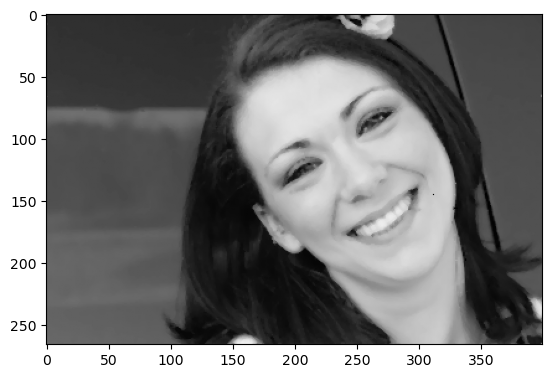

In [30]:
median_filtered_img = np.median(shifts, axis=0)

plt.imshow(median_filtered_img, cmap='gray', vmin=0, vmax=1)

Let's compare the execution time to our previous version of the `3` by `3` median filter that accounts for edge pixels.

In [31]:
t0 = time()

num_rows, num_cols = noisy_img.shape
padded_img = np.ones((num_rows + 2, num_cols + 2))/2  # Create an array of 0.5 that will store our padded image
padded_img[1:-1, 1:-1] = noisy_img

shift_1 = padded_img[1:-1, 1:-1]   # Original
shift_2 = padded_img[0:-2, 1:-1]   # Down by 1
shift_3 = padded_img[2:  , 1:-1]   # Up by 1
shift_4 = padded_img[1:-1, 0:-2]   # Left by 1
shift_5 = padded_img[1:-1, 2:  ]   # Right by 1
shift_6 = padded_img[2:  , 0:-2]   # Up by 1, left by 1
shift_7 = padded_img[2:  , 2:  ]   # Up by 1, right by 1
shift_8 = padded_img[:-2 , 0:-2]   # Down by 1, left by 1
shift_9 = padded_img[:-2 , 2:  ]   # Down by 1, right by 1

shifts = np.stack([shift_1, shift_2, shift_3, shift_4, shift_5, shift_6, shift_7, shift_8, shift_9])

median_filtered_img = np.median(shifts, axis=0)

t1 = time()

print('Execution time: {} seconds'.format(t1-t0))

Execution time: 0.1158134937286377 seconds


This is roughly 40 times faster than our previous code which found grids separately for each row/column.

In implementing this approach, we manually wrote out each of the nine shifted arrays that were used. Can we do this in a more algorithmic way? One idea is to again use a pair of nested `for` loops, but this time we iterate through a list of horizontal shifts and another list of vertical shifts.

In [35]:
shifts = []

for i_shift in [-1,0,1]:
    for j_shift in [-1,0,1]:
        shift = padded_img[1 + i_shift:num_rows-1 + i_shift, 1 + j_shift:num_cols-1 + j_shift]
        shifts.append(shift)

median_filtered_img = np.median(shifts, axis=0)

In [37]:
median_filtered_img.shape

(264, 398)

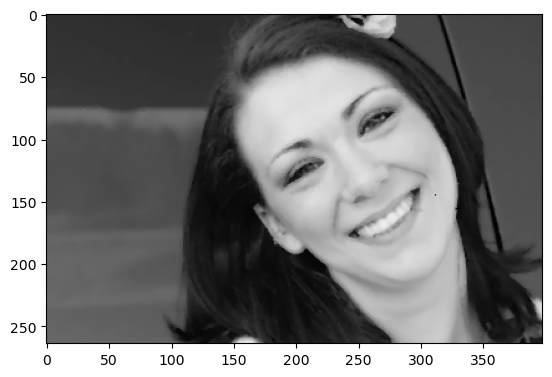

In [36]:
plt.imshow(median_filtered_img, cmap='gray', vmin=0, vmax=1)